# ソルバーを使わずに連立常微分方程式を解く
ここでは多次元の常微分方程式を扱う．  
題材は有名なローレンツ方程式とする．  
<br>
<br>
<!-- <img src="https://latex.codecogs.com/svg.image?\begin{pmatrix}\dot{x}\\\dot{y}\\\dot{z}\end{pmatrix}&space;=&space;\begin{pmatrix}-px&plus;py\\-xz&plus;rx-y\\xy-bz\end{pmatrix}" title="\bg_white \dot{x}=ax">  
<br> -->

$$
\begin{bmatrix}
\dot{x}\\
\dot{y}\\
\dot{z}\\
\end{bmatrix} = \begin{bmatrix}
\ -px+py\\
\ -xz+rx-y\\
\ xy-bz\\
\end{bmatrix}
$$

ただし  

$$
\begin{bmatrix}
\ x_0\\
\ y_0\\
\ z_0\\
\end{bmatrix} = \begin{bmatrix}
\ 0\\
\ 4\\
\ 28\\
\end{bmatrix},  \quad  p = 10,  \quad  r = 28,  \quad  b = \frac{8}{3}
$$

とする．  

In [47]:
import matplotlib.pyplot as plt
import numpy as np

標準のリストで多次元配列の和を計算するのはかなり面倒です（実装してみるとわかる）．  
ex. 次の２つのベクトル$a$と$b$の和を計算する  
$$
a = \begin{bmatrix}
1\\
2\\
\end{bmatrix},~~~b = \begin{bmatrix}
3\\
4\\
\end{bmatrix}
$$

In [48]:
# 標準のリストを使う
a = [1, 2]
b = [3, 4]

ans = []
for i in range(2):
    ans.append(a[i] + b[i])

ans

[4, 6]

In [49]:
# numpyで実装
a = np.array([1, 2])
b = np.array([3, 4])

a + b

array([4, 6])

このようにnumpyを使うことで直感的な行列（ベクトル）演算が行なえます．  
多次元の場合，ベクトル和を一気に計算できるのでndarrayを使うのが楽です．  

## 微分方程式の定義

In [50]:
def loorenz(X, p, r, b):
    """ローレンツ方程式
    * Xは状態変数ベクトル（ndarray）
    * p, r, bはパラメータ
    """
    
    x, y, z = X  # アンパック．右辺のndarryから１つずつ値を取り出す．
    
    dx = -p*x + p*y
    dy = -x*z + r*x -y
    dz = x*y - b*z
    
    return np.array([dx, dy, dz])

ルンゲクッタ法で解いてみる．  

In [51]:
dt = 0.01

# パラメータ
p = 10
r = 28
b = 8/3

N_TOTAL = 5000  #ループ回数

In [52]:
x = []  # 解xを格納する空のリスト
t = []  # 時刻tnを格納するリスト

# 初期値代入
x.append(np.array([0, 4, 28]))
t.append(0)

for i in range(N_TOTAL-1):
    # 係数を計算
    k1 = loorenz(x[i], p, r, b)
    k2 = loorenz(x[i] + dt/2*k1, p, r, b)
    k3 = loorenz(x[i] + dt/2*k2, p, r, b)
    k4 = loorenz(x[i] + dt*k3, p, r, b)
    
    x_next = x[i] + dt/6*(k1 + 2*k2 + 2*k3 + k4)  # 解を更新
    t_next = t[i] + dt
    
    # 解を格納
    x.append(x_next)
    t.append(t_next)

解`x`はndarrayのリストになっているので特定の行を取り出すのが大変です．  

In [53]:
x[:5]

[array([ 0,  4, 28]),
 array([ 0.37874472,  3.96113633, 27.27079661]),
 array([ 0.71798164,  3.92785062, 26.57466741]),
 array([ 1.02220782,  3.9042356 , 25.90911523]),
 array([ 1.29583319,  3.89341441, 25.27202581])]

データにアクセスしやすくするため，単一のndarrayに変換する．  

In [54]:
x = np.stack(x)

In [55]:
x

array([[ 0.        ,  4.        , 28.        ],
       [ 0.37874472,  3.96113633, 27.27079661],
       [ 0.71798164,  3.92785062, 26.57466741],
       ...,
       [10.04876959,  0.80432043, 37.42584539],
       [ 9.12585895, -0.05854653, 36.47531608],
       [ 8.21723138, -0.74699631, 35.48024863]])

0列目にxの時刻歴，1列目にyの時刻歴，2列目にzの時刻歴が入っている二次元ndarray`x`が作れた．  
解をプロットしてみる．  

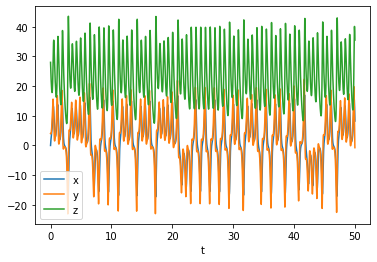

In [56]:
plt.plot(t, x[:, 0], label="x")
plt.plot(t, x[:, 1], label="y")
plt.plot(t, x[:, 2], label="z")
plt.xlabel("t")
plt.legend()

周期的な振動が起こっていることがわかる．  
3次元プロットしてみる．  

Text(0.5, 0, 'z')

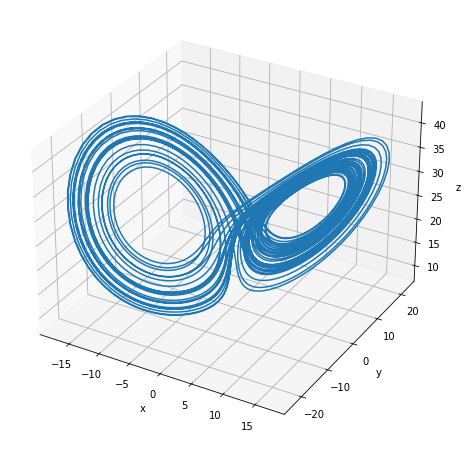

In [57]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.plot(x[:, 0], x[:, 1], x[:, 2])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

有名なローレンツアトラクタの図が得られた．  
jupyter以外で`plt.show()`すると別ウィンドウで3Dグラフが表示され，くるくる回転させたりズームさせたりできる．  

----
## ndarrayに書き込む方法

空リストに計算結果をappendしていくのではなく，はじめに結果を書き出すndarrayを準備してから順に書き込んでいくやり方です．  
~~pythonではリストにappendすると，前のリストを破棄して新たなリストを作成するため遅くなります．~~  
~~そのため予めndarray等で場所を確保してから書き込んでいくほうが高速です．~~  

In [58]:
x_nd = np.empty((N_TOTAL, 3))  # 解xを格納する二次元ndarray
t_nd = np.empty(N_TOTAL)  # 時刻tnを格納する一次元ndarray

# 初期値を書き込む
x_nd[0, :] = np.array([0, 4, 28])  # :はその次元の全てを選択することを表す．(0:end と等価)
t_nd[0] = 0

for i in range(N_TOTAL-1):
    k1 = loorenz(x_nd[i,:], p, r, b)
    k2 = loorenz(x_nd[i,:] + dt/2*k1, p, r, b)
    k3 = loorenz(x_nd[i,:] + dt/2*k2, p, r, b)
    k4 = loorenz(x_nd[i,:] + dt*k3, p, r, b)
    x_next = x_nd[i, :] + dt/6*(k1 + 2*k2 + 2*k3 + k4)  # 解を更新
    t_next = t[i] + dt
    # 解を格納
    x_nd[i+1, :] = x_next
    t_nd[i+1] = t_next

Text(0.5, 0, 'z')

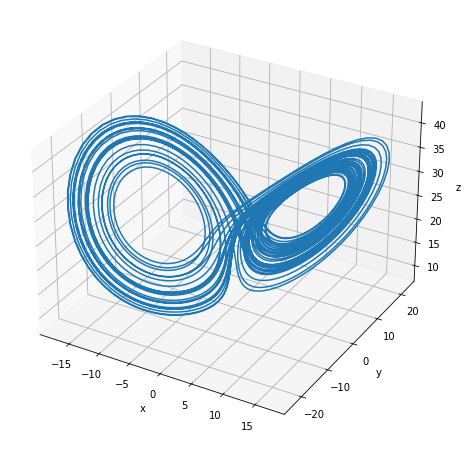

In [59]:
fig_nd = plt.figure(figsize=(8, 8))
ax_nd = fig_nd.add_subplot(projection='3d')
ax_nd.plot(x_nd[:, 0], x_nd[:, 1], x_nd[:, 2])
ax_nd.set_xlabel("x")
ax_nd.set_ylabel("y")
ax_nd.set_zlabel("z")

~~ループ回数が1000回くらいでは違いは出ませんが，ループ回数が増えれば増えるほど計算時間の差は大きくなります．~~  
jupyterのマジックコマンド`%timeit`を使って比較してみる．  

### 速度比較

In [60]:
def hutsu_no_list(N):
    x = []
    t = []
    x.append(np.array([0, 4, 28]))
    t.append(0)

    for i in range(N-1):
        k1 = loorenz(x[i], p, r, b)
        k2 = loorenz(x[i] + dt/2*k1, p, r, b)
        k3 = loorenz(x[i] + dt/2*k2, p, r, b)
        k4 = loorenz(x[i] + dt*k3, p, r, b)        
        x_next = x[i] + dt/6*(k1 + 2*k2 + 2*k3 + k4)
        t_next = t[i] + dt
        
        x.append(x_next)
        t.append(t_next)
    
    return t, np.stack(x)


def ndarray_tsukau(N):
    x_nd = np.empty((N, 3))
    t_nd = np.empty(N)
    x_nd[0, :] = np.array([0, 4, 28])
    t_nd[0] = 0
    

    for i in range(N-1):
        k1 = loorenz(x_nd[i,:], p, r, b)
        k2 = loorenz(x_nd[i,:] + dt/2*k1, p, r, b)
        k3 = loorenz(x_nd[i,:] + dt/2*k2, p, r, b)
        k4 = loorenz(x_nd[i,:] + dt*k3, p, r, b)
        x_nd[i+1, :] = x_nd[i, :] + dt/6*(k1 + 2*k2 + 2*k3 + k4)
        t_nd[i+1] = t_nd[i] + dt

    return t_nd, x_nd

ループ回数を指定

In [61]:
N = 100000

In [62]:
%%timeit
hutsu_no_list(N)

909 ms ± 2.15 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [63]:
%%timeit
ndarray_tsukau(N)

1.04 s ± 4.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


ndarrayを準備するほうが遅い？  
numbaで高速化してみる．  

In [64]:
from numba import njit

@njit("void(float64[:], float64, float64, float64, float64[:])")
def loorenz_2(X, p, r, b, out):
    out[0] = -p*X[0] + p*X[1]
    out[1] = -X[0]*X[2] + r*X[0] - X[1]
    out[2] = X[0]*X[1] - b*X[2]

@njit("Tuple((float64[:], float64[:, :]))(int64)")
def ndarray_tsukau_2(N):
    x_nd = np.empty((N, 3))
    t_nd = np.empty(N)
    x_nd[0, :] = np.array([0, 4, 28])
    t_nd[0] = 0
    
    k1 = np.empty(3)
    k2 = np.empty(3)
    k3 = np.empty(3)
    k4 = np.empty(3)

    for i in range(N-1):
        loorenz_2(x_nd[i,:], p, r, b, k1)
        loorenz_2(x_nd[i,:] + dt/2*k1, p, r, b, k2)
        loorenz_2(x_nd[i,:] + dt/2*k2, p, r, b, k3)
        loorenz_2(x_nd[i,:] + dt*k3, p, r, b, k4)
        x_nd[i+1, :] = x_nd[i, :] + dt/6*(k1 + 2*k2 + 2*k3 + k4)
        t_nd[i+1] = t_nd[i] + dt

    return t_nd, x_nd

In [65]:
%%timeit
ndarray_tsukau_2(N)

15 ms ± 10.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


少し早くなった（909ms -> 15ms）．  

自分で行う高速化には限界があるので，素直にソルバー使ったほうがいいです．  